In [1]:
import mlflow
import pandas as pd
from ultralytics import YOLO, settings
from roboflow import Roboflow
import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
rf = Roboflow(api_key="dh1IQQWaRMJr2hLveWqL")
project = rf.workspace("daniels-magonis-0pjzx").project("valorant-9ufcp")
version = project.version(3)
dataset = version.download("yolov11", "./datasets/")
settings.update({'mlflow': True})

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ./datasets/ in yolov11:: 100%|██████████| 19808/19808 [00:10<00:00, 1979.25it/s]


In [7]:
dataset.name

'valorant'

In [15]:
ds = datasets.load_dataset("keremberke/valorant-object-detection", "full")
ds = ds['train'].to_pandas()
objects_df = pd.json_normalize(ds.objects) \
    .set_index(ds['image_id']) \
    .explode(['id', 'area', 'bbox', 'category'])

objects_df.rename(columns={'id': 'object_id'}, inplace=True)
ds = ds.drop(columns='objects').join(objects_df, how='inner')

<AxesSubplot: title={'center': 'Class Distribution'}, xlabel='category', ylabel='Count'>

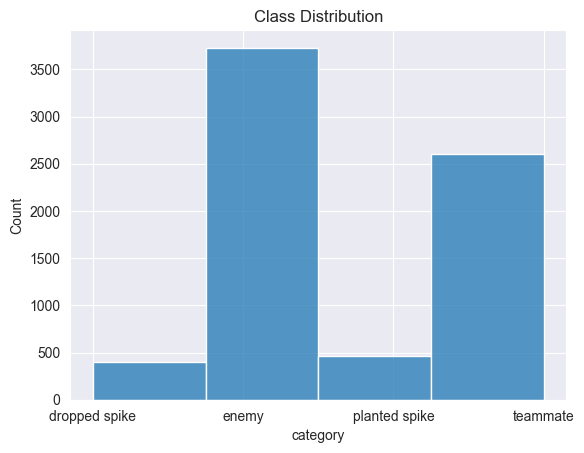

In [4]:
ds = ds.dropna()
plt.title('Class Distribution')
plt.xticks(range(4), ['dropped spike', 'enemy', 'planted spike', 'teammate'])
sns.histplot(ds['category'], bins=4)

In [5]:
ds.shape

(7184, 8)

<AxesSubplot: xlabel='area', ylabel='Count'>

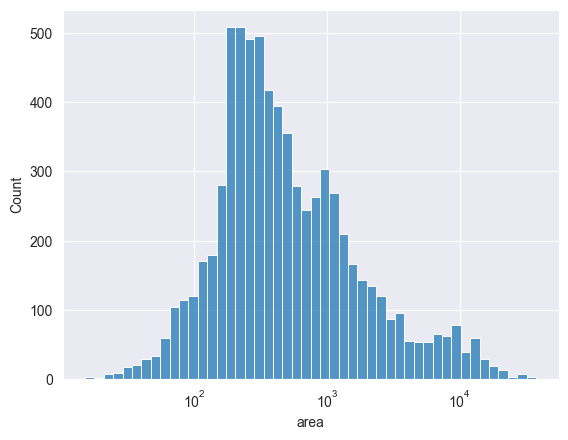

In [6]:
plt.xscale('log')
sns.histplot(ds['area'])

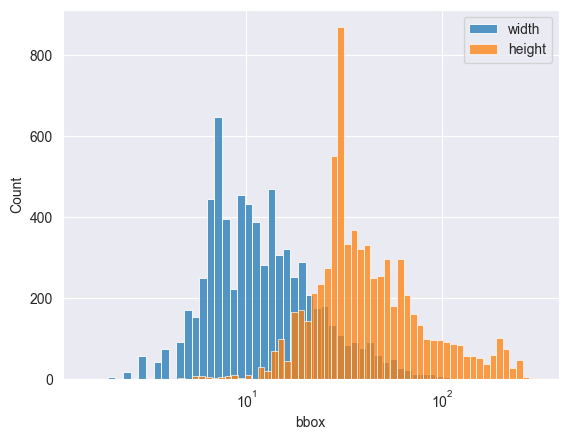

In [7]:
plt.xscale('log')
sns.histplot(ds['bbox'].apply(lambda x: x[2]))
sns.histplot(ds['bbox'].apply(lambda x: x[3]))
plt.legend(['width', 'height'])

<AxesSubplot: title={'center': 'aspect ratio'}, xlabel='bbox', ylabel='Count'>

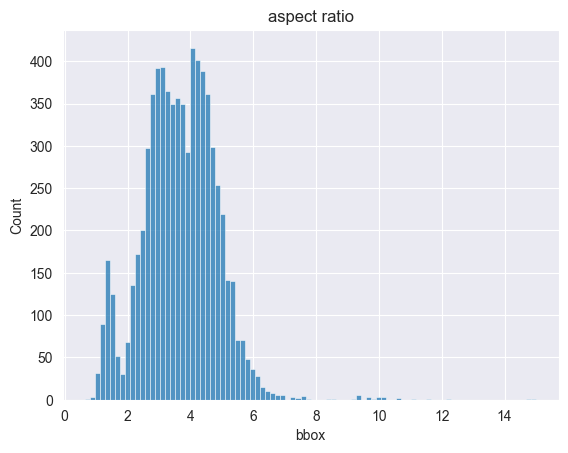

In [8]:
plt.title('aspect ratio')
sns.histplot(ds['bbox'].apply(lambda x: x[3] / x[2]))

In [12]:
model = YOLO('./main/models/yolo11n.pt')
# model.train(data='./main/datasets/valorant-3/data.yaml', epochs=8, batch=16, imgsz=416, device=0, pretrained=True, project='YOLO experiment', name='training_l')

In [8]:
model.val(data='./datasets/valorant-3/data.yaml', batch=16, imgsz=416, device=0, name='evaluation')

Transferred 1009/1015 items from pretrained weights


Registered model 'yolo11l' already exists. Creating a new version of this model...
Created version '1' of model 'yolo11l'.


<ModelVersion: aliases=[], creation_timestamp=1732193661875, current_stage='None', description=None, last_updated_timestamp=1732193661875, name='yolo11l', run_id='fa057e449fcf4fc78ac220a92e6f4f48', run_link=None, source='file:///E:/YandexDisk/Notebooks/test_task/runs/mlflow/184463932476833991/fa057e449fcf4fc78ac220a92e6f4f48/artifacts', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [6]:
model.tune(iterations=20)

Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune2'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
WARNING  training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=./models/yolo11s.pt', 'data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml', 'epochs=100', 'time=None', 'patience=100', 'batch=16', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=./runs/de